<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [1]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [2]:
# To-Do: create a virtual environement called data_analytics
! virtualenv data_analytics

created virtual environment CPython3.8.11.final.0-64 in 12258ms
  creator CPython3Windows(dest=D:\computer_vision_projects\Bootcamp\deeplearning_bootcamp\Unit2\Project\Unit2-Project\data_analytics, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=C:\Users\DELL\AppData\Local\pypa\virtualenv)
    added seed packages: pip==21.3.1, setuptools==58.5.3, wheel==0.37.0
  activators BashActivator,BatchActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [1]:
# Activate the environement for windows
# source data_analytics/bin/activate
# actually this one worked for me
! .\\data_analytics\\Scripts\\activate 

In [ ]:
# Activate the environement for linux (debian based)
!. data_analytics/bin/activate

### 2. Importing necessary tools:<a id='importing'></a>

In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [306]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [372]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df = pd.read_csv("kc_house_data.csv")
# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [373]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21606 non-null  object 
 2   price          21608 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21612 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21611 non-null  float64
 15  yr_renovated   21612 non-null  float64
 16  zipcode        21611 non-null  float64
 17  lat            21612 non-null  float64
 18  long  

### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [374]:
# To-Do: deal with the NAs in your dataset in one line
df.dropna(inplace=True,axis=0)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21588 non-null  int64  
 1   date           21588 non-null  object 
 2   price          21588 non-null  float64
 3   bedrooms       21588 non-null  int64  
 4   bathrooms      21588 non-null  float64
 5   sqft_living    21588 non-null  float64
 6   sqft_lot       21588 non-null  float64
 7   floors         21588 non-null  float64
 8   waterfront     21588 non-null  int64  
 9   view           21588 non-null  int64  
 10  condition      21588 non-null  int64  
 11  grade          21588 non-null  int64  
 12  sqft_above     21588 non-null  float64
 13  sqft_basement  21588 non-null  int64  
 14  yr_built       21588 non-null  float64
 15  yr_renovated   21588 non-null  float64
 16  zipcode        21588 non-null  float64
 17  lat            21588 non-null  float64
 18  long  

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [376]:
# To-Do: delete the values of the variables that are useless
df.drop(["id","date","zipcode"], axis=1,inplace=True)

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21588 non-null  float64
 1   bedrooms       21588 non-null  int64  
 2   bathrooms      21588 non-null  float64
 3   sqft_living    21588 non-null  float64
 4   sqft_lot       21588 non-null  float64
 5   floors         21588 non-null  float64
 6   waterfront     21588 non-null  int64  
 7   view           21588 non-null  int64  
 8   condition      21588 non-null  int64  
 9   grade          21588 non-null  int64  
 10  sqft_above     21588 non-null  float64
 11  sqft_basement  21588 non-null  int64  
 12  yr_built       21588 non-null  float64
 13  yr_renovated   21588 non-null  float64
 14  lat            21588 non-null  float64
 15  long           21588 non-null  float64
 16  sqft_living15  21588 non-null  float64
 17  sqft_lot15     21588 non-null  int64  
dtypes: flo

### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [362]:
# To-Do : get to know more your data WITHOUT modifying it !!
# show unique values per column
def show_unique_values(dataset: pd.DataFrame, columns: list)->None:
    for column in dataset[columns]:
        print(f"column {column} : {pd.unique(dataset[column])}")

columns = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade"]
show_unique_values(df,columns=columns)

column bedrooms : [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
column bathrooms : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
column floors : [1.  2.  1.5 3.  2.5 3.5]
column waterfront : [0 1]
column view : [0 3 4 2 1]
column condition : [3 5 4 1 2]
column grade : [ 7  6  8 11  9  5 10 12  4  3 13  1]


<AxesSubplot:xlabel='long', ylabel='lat'>

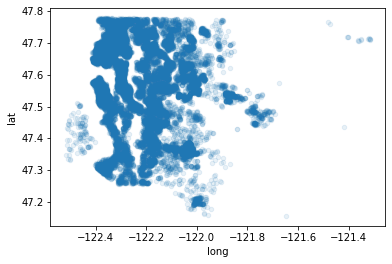

In [363]:
df.plot(kind="scatter",x="long", y="lat",alpha=0.1)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

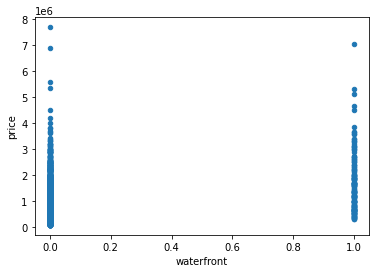

In [364]:
df.plot(kind="scatter",x="waterfront", y="price",alpha=1)

<AxesSubplot:xlabel='grade', ylabel='price'>

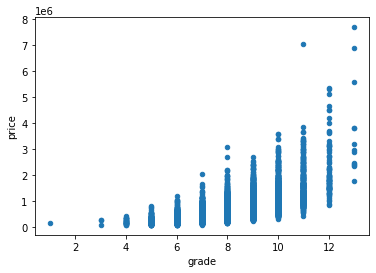

In [365]:
df.plot(kind="scatter",x="grade", y="price",alpha=1)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='floors', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bedrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='floors', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='view', ylabel='bathrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='floors'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='floors'>,
        <AxesSubpl

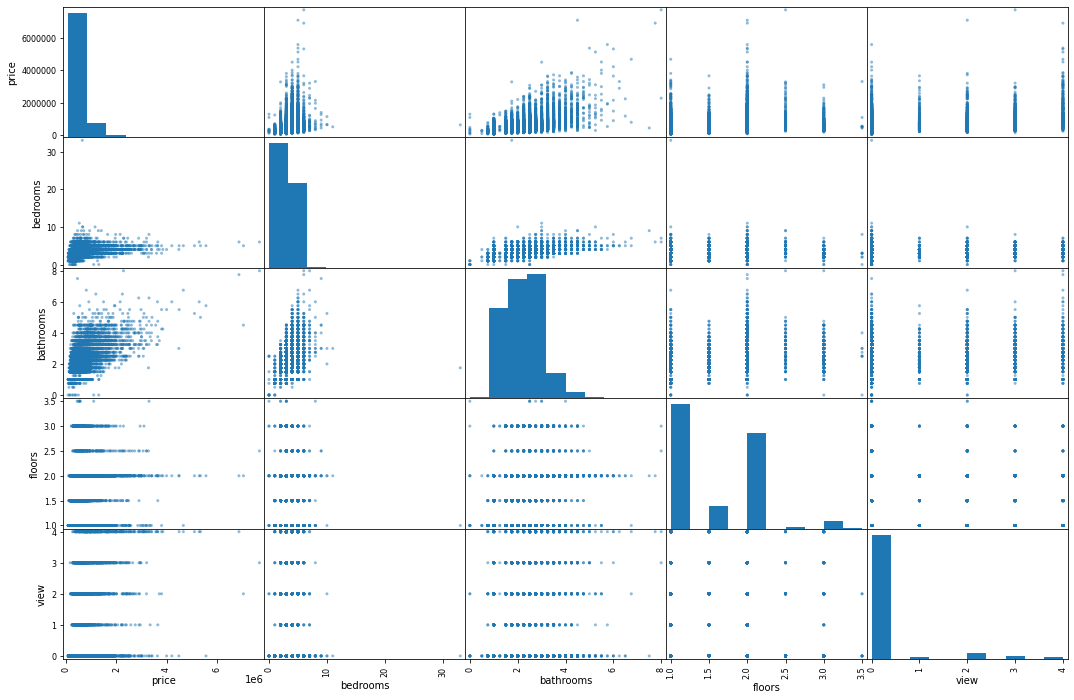

In [366]:
from pandas.plotting import scatter_matrix

attributes = ["price", "bedrooms", "bathrooms",
              "floors","view"]
scatter_matrix(df[attributes], figsize=(18, 12))

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_basement', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_basement'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_basement'>],
       [<AxesSubplot:xlabel='price',

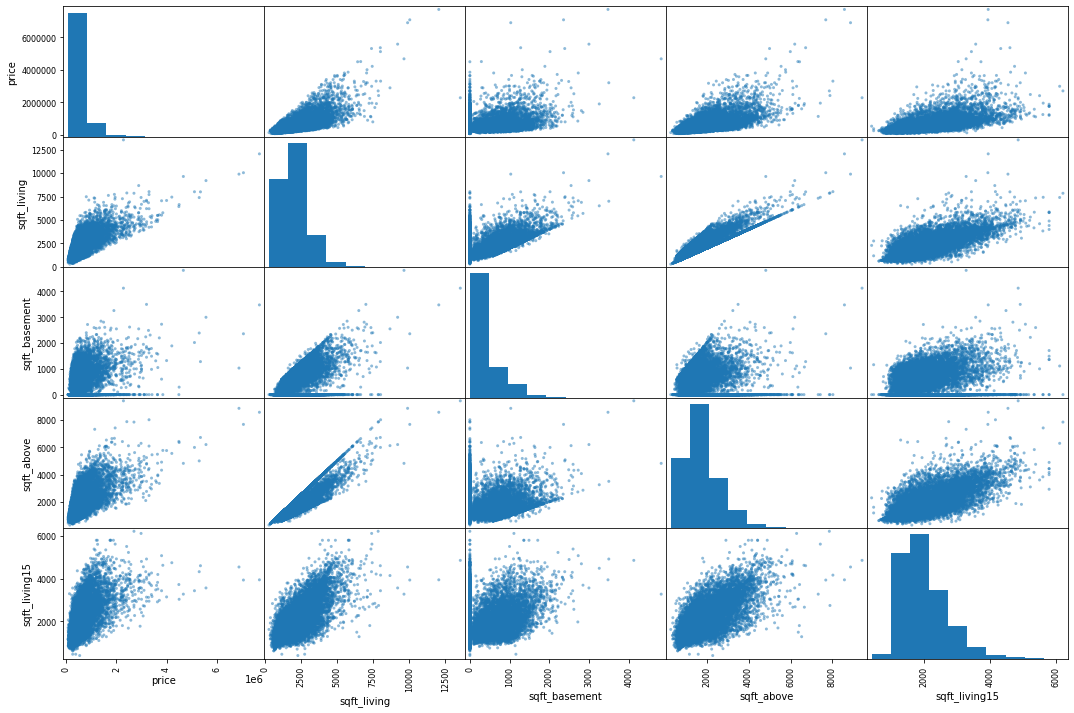

In [367]:
attributes = ["price", "sqft_living", "sqft_basement",
              "sqft_above","sqft_living15"]
scatter_matrix(df[attributes], figsize=(18, 12))

As we can see in the graphs above there is some pattern between the independent variables, which indicates the presence of correlation.

### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [378]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
import numpy as np
def z_score(dataset : pd.DataFrame, column: str)->np.float64:
    return (dataset[column] - dataset[column].mean())/dataset[column].std()

def clear_outliers(dataset: pd.DataFrame)->pd.DataFrame:
    # copy the original dataset to avoid performing operations directly on it
    tmp_data = dataset.copy()
    
    for column in tmp_data.columns :
        tmp_data[''.join((column,"_zscore"))] = z_score(tmp_data,column)
        tmp_data = tmp_data[tmp_data[''.join((column,"_zscore"))] <= 3]
        
        tmp_data.drop(''.join((column,"_zscore")),axis=1,inplace=True)
    return tmp_data

df = clear_outliers(df)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18126 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18126 non-null  float64
 1   bedrooms       18126 non-null  int64  
 2   bathrooms      18126 non-null  float64
 3   sqft_living    18126 non-null  float64
 4   sqft_lot       18126 non-null  float64
 5   floors         18126 non-null  float64
 6   waterfront     18126 non-null  int64  
 7   view           18126 non-null  int64  
 8   condition      18126 non-null  int64  
 9   grade          18126 non-null  int64  
 10  sqft_above     18126 non-null  float64
 11  sqft_basement  18126 non-null  int64  
 12  yr_built       18126 non-null  float64
 13  yr_renovated   18126 non-null  float64
 14  lat            18126 non-null  float64
 15  long           18126 non-null  float64
 16  sqft_living15  18126 non-null  float64
 17  sqft_lot15     18126 non-null  int64  
dtypes: flo

### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

<AxesSubplot:>

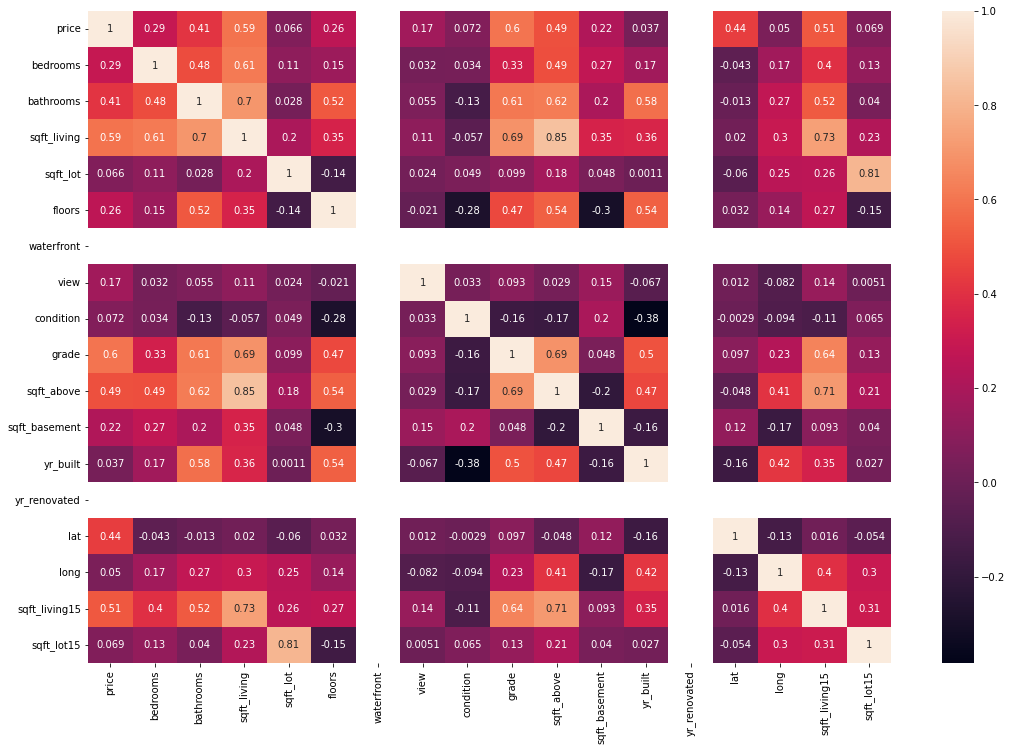

In [380]:
# To-Do : perform feature selection using correlation
corr = df.corr()
ax , fig = plt.subplots(figsize=(18,12))
sns.heatmap(corr, annot=True)

In [381]:
# Selecting relevant features
corr_target = abs(corr["price"])
relevant_features = corr_target[corr_target > 0.3]
relevant_features

price            1.000000
bathrooms        0.413953
sqft_living      0.590265
grade            0.599583
sqft_above       0.494014
lat              0.440744
sqft_living15    0.514321
Name: price, dtype: float64

In [382]:
# To-Do : drop the variables that seem highly correlated to you
df[["bathrooms","sqft_living","grade","sqft_above","lat","sqft_living15"]].corr()

,bathrooms,sqft_living,grade,sqft_above,lat,sqft_living15
bathrooms,1.000000,0.700928,0.608029,0.619035,-0.013041,0.519171
sqft_living,0.700928,1.000000,0.687510,0.847377,0.020353,0.731108
grade,0.608029,0.687510,1.000000,0.691552,0.097045,0.642650
sqft_above,0.619035,0.847377,0.691552,1.000000,-0.047572,0.711380
lat,-0.013041,0.020353,0.097045,-0.047572,1.000000,0.016280
sqft_living15,0.519171,0.731108,0.642650,0.711380,0.016280,1.000000


In [385]:
df = df[["price","bathrooms","sqft_living","grade","sqft_above","lat","sqft_living15"]].copy()

df.drop(["bathrooms","sqft_living15","sqft_living","sqft_above"],axis=1,inplace=True)
df

,price,grade,lat
0,221900.0,7,47.5112
2,180000.0,6,47.7379
3,604000.0,7,47.5208
4,510000.0,8,47.6168
6,257500.0,7,47.3097
...,...,...,...
21608,360000.0,8,47.6993
21609,400000.0,8,47.5107
21610,402101.0,7,47.5944
21611,400000.0,8,47.5345


### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [386]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [388]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [389]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
model.score(X, Y)

0.5072420773563127

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.